In [1]:
using Catlab
using Catlab.Theories
using Catlab.Graphics
using Catlab.WiringDiagrams
using Catlab.CategoricalAlgebra
using Catlab.Programs

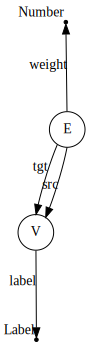

In [3]:
@present TheoryIWGraph(FreeSchema) begin
    Label::AttrType
    Number::AttrType
    V::Ob
        label::Attr(V,Label)
    E::Ob
        weight::Attr(E,Number)
        src::Hom(E,V)
        tgt::Hom(E,V)
end

@abstract_acset_type AbstractIWGraph
@acset_type IWGraph(TheoryIWGraph,index=[:src,:tgt]) <: AbstractIWGraph

to_graphviz(TheoryIWGraph)

In [4]:
G = @acset IWGraph{String,Float64} begin
    V = 6
    label = ["A","B","C","D","E","F"]
    E = 9
    weight = [1.0,2.3,0.7,4.5,6.7,3.2,1.3,4.2,3.7]
    src = [1,1,2,3,4,5,5,6,2]
    tgt = [2,6,3,6,5,6,2,1,4]
end

IWGraph{String, Float64} with elements V = 1:6, E = 1:9
┌───┬───────┐
│ V │ label │
├───┼───────┤
│ 1 │     A │
│ 2 │     B │
│ 3 │     C │
│ 4 │     D │
│ 5 │     E │
│ 6 │     F │
└───┴───────┘
┌───┬─────┬─────┬────────┐
│ E │ src │ tgt │ weight │
├───┼─────┼─────┼────────┤
│ 1 │   1 │   2 │    1.0 │
│ 2 │   1 │   6 │    2.3 │
│ 3 │   2 │   3 │    0.7 │
│ 4 │   3 │   6 │    4.5 │
│ 5 │   4 │   5 │    6.7 │
│ 6 │   5 │   6 │    3.2 │
│ 7 │   5 │   2 │    1.3 │
│ 8 │   6 │   1 │    4.2 │
│ 9 │   2 │   4 │    3.7 │
└───┴─────┴─────┴────────┘

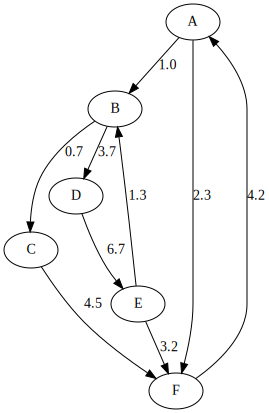

In [5]:
include("draw.jl")
draw(G)

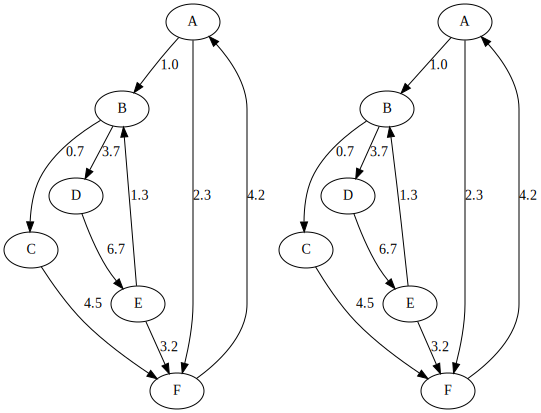

In [6]:
draw(G⊕G)

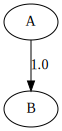

In [7]:
E = @acset IWGraph{String,Float64} begin
    V = 2
    label = ["A","B"]
    E = 1
    weight = [1.0]
    src = [1]
    tgt = [2]
end
draw(E)

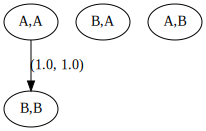

In [8]:
draw(E⊗E)

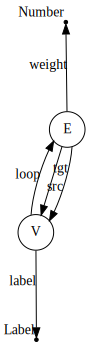

In [9]:
@present TheoryIWRGraph <: TheoryIWGraph begin
    loop::Hom(V,E)
    loop ⋅ src == id(V)
    loop ⋅ tgt == id(V)
end

@acset_type IWRGraph(TheoryIWRGraph,index=[:src,:tgt,:loop]) <: AbstractIWGraph

to_graphviz(TheoryIWRGraph)

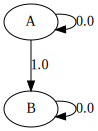

In [10]:
E2 = @acset IWRGraph{String,Float64} begin
    V = 2
    label = ["A","B"]
    E = 3
    weight = [1.0,0,0]
    src = [1,1,2]
    tgt = [2,1,2]
    loop = [2,3]
end
draw(E2)

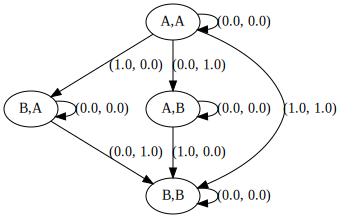

In [12]:
draw(E2⊗E2)

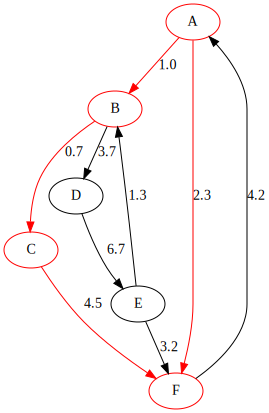

In [13]:
S = Subobject(G, V=[1,2,3,6], E=[1,2,3,4])
draw(S)

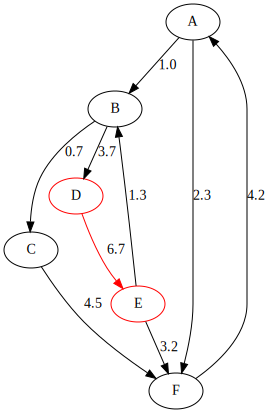

In [14]:
draw(¬S)

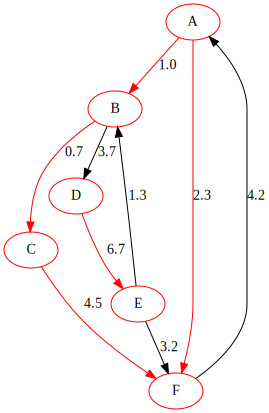

In [109]:
draw(S∨¬S)

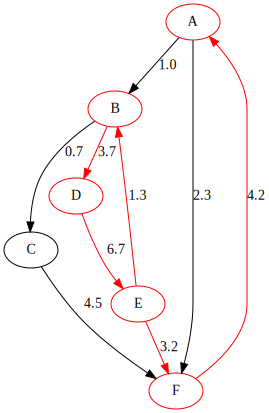

In [110]:
draw(~S)

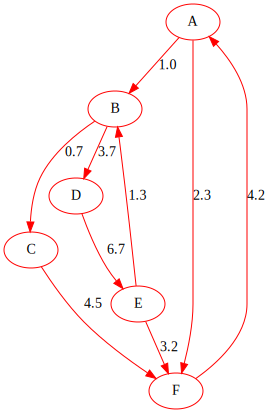

In [15]:
draw(S∨~S)

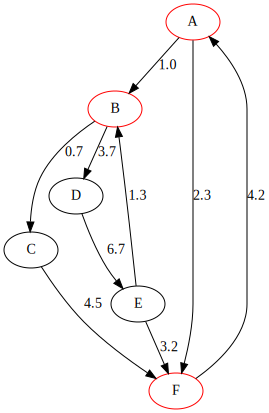

In [16]:
draw(S∧~S)